
<h1>Activity 2 - UK ROAD ACCIDENT DATA ANALYTICS</h1>
<hr>
<h3>Analyst: Jessie O. Mompero Jr</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

<h2>DATABASE</h2>

In [2]:
accident_df = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>FILLING NULL VALUES</h2>

In [4]:
accident_df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident_df['Latitude'] = accident_df['Latitude'].fillna(accident_df['Latitude'].mean())
accident_df['Longitude'] = accident_df['Longitude'].fillna(accident_df['Longitude'].mean())
accident_df['Road_Surface_Conditions'] = accident_df['Road_Surface_Conditions'].fillna('unaccounted')
accident_df['Road_Type'] = accident_df['Road_Type'].fillna('unaccounted')
accident_df['Urban_or_Rural_Area'] = accident_df['Urban_or_Rural_Area'].fillna(accident_df['Urban_or_Rural_Area'].mode()[0])
accident_df['Weather_Conditions'] = accident_df['Weather_Conditions'].fillna('unaccounted')
accident_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>CORRECTING DATA TYPES</h2>

In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
accident_df['Index'] = accident_df['Index'].astype('category')
accident_df['Accident_Severity'] = accident_df['Accident_Severity'].astype('category')
accident_df['Latitude'] = accident_df['Latitude'].astype('category')
accident_df['Light_Conditions'] = accident_df['Light_Conditions'].astype('category')
accident_df['District Area'] = accident_df['District Area'].astype('category')
accident_df['Road_Surface_Conditions'] = accident_df['Road_Surface_Conditions'].astype('category')
accident_df['Road_Type'] = accident_df['Road_Type'].astype('category')
accident_df['Urban_or_Rural_Area'] = accident_df['Urban_or_Rural_Area'].astype('category')
accident_df['Weather_Conditions'] = accident_df['Weather_Conditions'].astype('category')
accident_df['Vehicle_Type'] = accident_df['Vehicle_Type'].astype('category')

<h1>CLEARING INCONSISTENCIES WITH THE DATA SET</h1>

In [8]:
accident_df['Accident Date'] = accident_df['Accident Date'].str.strip()
accident_df['Accident Date'] = accident_df['Accident Date'].astype('str')
accident_df['Accident Date'] = accident_df['Accident Date'].str.replace('/', '-')

In [9]:
accident_df['Accident Date'] = pd.to_datetime(accident_df['Accident Date'], dayfirst=True, errors = 'coerce')
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>EXTRACTING DATE INFORMATION USING PADAS DATE TIME</h1>

In [10]:
accident_df['Year'] = accident_df['Accident Date'].dt.year
accident_df['Month'] = accident_df['Accident Date'].dt.month
accident_df['Day'] = accident_df['Accident Date'].dt.day
accident_df['DayOfWeek'] = accident_df['Accident Date'].dt.dayofweek # Monda=0, Sunday

In [11]:
accident_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [12]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h5>UniVariate</h5>
<h5>BiVariate</h5>
<h5>MultiVariate</h5>

<h1>1. What district area has the most accident when the road condition and weather condition is involved from the year 2020?</h1>

In [13]:
year_2020 = accident_df[accident_df['Year'] == 2020]
year_2020.groupby(['District Area', 'Road_Surface_Conditions', 'Weather_Conditions']).size().sort_values(ascending=False).head(10)

District Area  Road_Surface_Conditions  Weather_Conditions
Birmingham     Dry                      Fine no high winds    2252
Leeds          Dry                      Fine no high winds    1580
Westminster    Dry                      Fine no high winds    1111
Manchester     Dry                      Fine no high winds    1016
Liverpool      Dry                      Fine no high winds     932
Bradford       Dry                      Fine no high winds     931
Glasgow City   Dry                      Fine no high winds     877
Sheffield      Dry                      Fine no high winds     849
Lambeth        Dry                      Fine no high winds     814
Southwark      Dry                      Fine no high winds     807
dtype: int64

The total number of accident in year 2020 is  170591


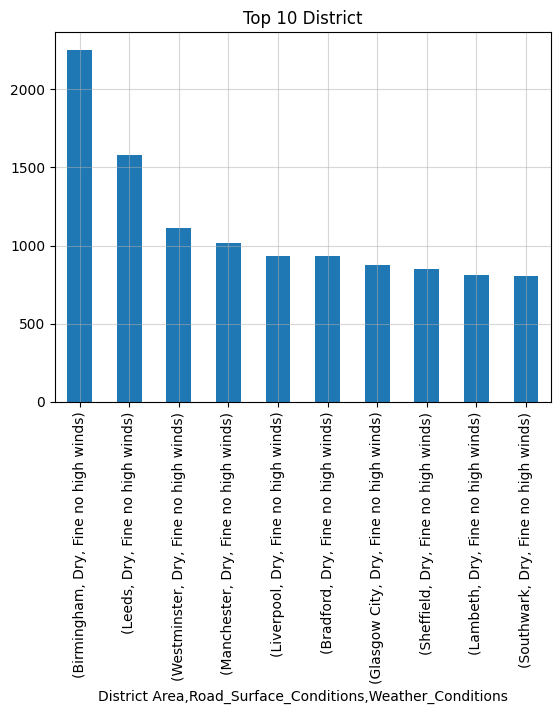

In [14]:
print('The total number of accident in year 2020 is ', year_2020.groupby(['District Area', 'Road_Surface_Conditions', 'Weather_Conditions']).size().sum())
year_2020.groupby(['District Area', 'Road_Surface_Conditions', 'Weather_Conditions']).size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 District')
plt.grid(alpha=0.5)
plt.show()

In [15]:
year_2020['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     113506
Wet or damp              52076
Frost or ice              3870
Snow                       598
Flood over 3cm. deep       331
unaccounted                210
Name: count, dtype: int64

In [16]:
year_2020['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       132513
Raining no high winds     21984
Other                      4265
unaccounted                3937
Raining + high winds       3130
Fine + high winds          2861
Fog or mist                 981
Snowing no high winds       719
Snowing + high winds        201
Name: count, dtype: int64

<h2>Insight No 1</h2>
Insight: From the year 2020, when the road condition is dry and the weather condition is fine no high winds, the Bermingham district has the most recorded number of 2,252 accident, that is just 1.3% of the whole number of accident which is  170,591. This gives me the idea that even when the weather condition is good accident still happen. 

<h2>Insight No 2</h2>
The total accident on dry road condtion is 113,506 which is 66.5% of the total accident that is 170,591. For me, this is a really good weather for a drive beacuse there is nothing to worry about, I guess humans are most vulnerable when we are in a relaxed environment or in a relaxed situation then plot twist somethime happened and that is a unfortunate accident.

<h1>2. In year 2020, what type of vehicle is most prone to accident when the weather condition is raining with high winds is involved? (Not including Cars)</h1>

In [17]:
year_2020['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       132513
Raining no high winds     21984
Other                      4265
unaccounted                3937
Raining + high winds       3130
Fine + high winds          2861
Fog or mist                 981
Snowing no high winds       719
Snowing + high winds        201
Name: count, dtype: int64

In [18]:
no_car = year_2020[year_2020['Vehicle_Type'] != 'Car']
raining_now = no_car['Weather_Conditions'].value_counts()
raining_now

Weather_Conditions
Fine no high winds       33027
Raining no high winds     5591
Other                     1088
unaccounted                999
Raining + high winds       763
Fine + high winds          727
Fog or mist                265
Snowing no high winds      181
Snowing + high winds        56
Name: count, dtype: int64

In [19]:
no_car = year_2020[year_2020['Weather_Conditions'] == 'Raining + high winds']
raining_now = no_car['Vehicle_Type'].value_counts()
raining_now

Vehicle_Type
Car                                      2367
Van / Goods 3.5 tonnes mgw or under       173
Motorcycle over 500cc                     116
Bus or coach (17 or more pass seats)      111
Goods 7.5 tonnes mgw and over              93
Motorcycle 125cc and under                 66
Taxi/Private hire car                      62
Motorcycle over 125cc and up to 500cc      37
Motorcycle 50cc and under                  30
Other vehicle                              30
Goods over 3.5t. and under 7.5t            25
Agricultural vehicle                       13
Minibus (8 - 16 passenger seats)            7
Data missing or out of range                0
Pedal cycle                                 0
Ridden horse                                0
Name: count, dtype: int64

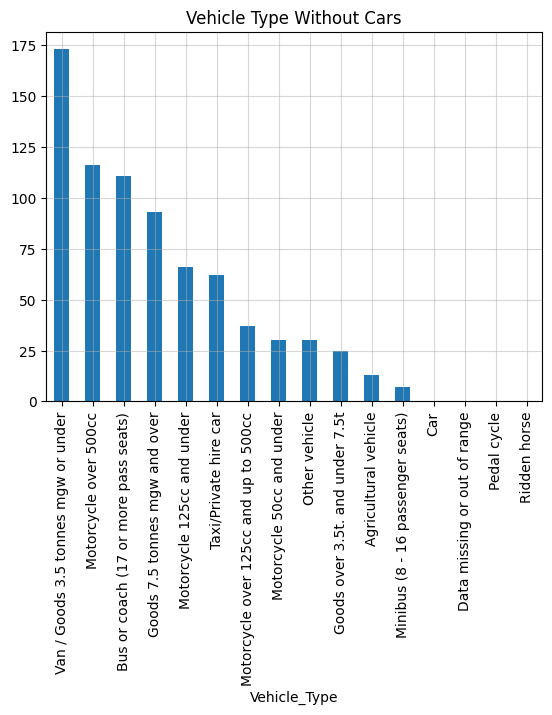

In [20]:
no_car = year_2020[year_2020['Weather_Conditions'] == 'Raining + high winds']
raining_now = no_car[no_car['Vehicle_Type'] != 'Car']['Vehicle_Type'].value_counts()
raining_now.plot(kind='bar')
plt.title('Vehicle Type Without Cars')
plt.grid(alpha=0.5)
plt.show()

<h2>Insight No 3</h2>
Insight: Wihout including the Car, the most prone are Van / Goods 3.5 tonnes mgw or under. Maybe because they are more active at road because Vans could be a vehicle for transporation and Van Goods are those who trade products. It could be that there are time limit for arriving that is why they sped up and end up in accident.    

<h1>3. What road surface condition has the most accident in the year 2019 and what road type does it mostly happened?</h1>

In [21]:
year_2019 = accident_df[accident_df['Year'] == 2019]
year_2019['Road_Surface_Conditions'].value_counts()
print('The total sum of accident from the year 2019 is', year_2019.groupby(['Road_Surface_Conditions', 'Road_Type']).size().sum())
year_2019.groupby(['Road_Surface_Conditions', 'Road_Type']).size().sort_values(ascending=False)

The total sum of accident from the year 2019 is 182115


Road_Surface_Conditions  Road_Type         
Dry                      Single carriageway    92487
Wet or damp              Single carriageway    39491
Dry                      Dual carriageway      19189
Wet or damp              Dual carriageway       8545
Dry                      Roundabout             8226
Wet or damp              Roundabout             3299
Dry                      One way street         2888
Frost or ice             Single carriageway     2150
Dry                      Slip road              1344
                         unaccounted            1214
Wet or damp              One way street          883
                         Slip road               603
Snow                     Single carriageway      411
Wet or damp              unaccounted             332
Frost or ice             Dual carriageway        237
Flood over 3cm. deep     Single carriageway      222
unaccounted              Single carriageway      137
Frost or ice             Roundabout              118
Sn

<h2>Insight No 4</h2>
Insight: In the year 2019, accident mostly happened from  dry road surface condtions on a single carriageway road type with 92487 record which is 50.78% of the 182115 total accident. Its a dry road so its good for driving compared to wet or damp who has 39491 record which is 21.68%. I thought that it is more dangerous to drive when the road is wet bacause it is slippery but this data shows me that maybe accidents are mostly made by human errors.  

<h2>Insight No 5</h2>
Insight: Comparing Single carriageway and Dual carriageway when the road condition is dry, what I found is  that dual carriageway are seperated by something like a barrier in the middle. So maybe this factor plays at the number of accidents, drivers at the dual carriageway feel more safer because of the barrier at the middle that is why they drive safer.   

<h1>4. Compare the year 2019 - 2022, In the month of december, does the record of accident is rising or decreasing?<h1>

In [22]:
accident_df.groupby(['Year','Month']).size()

Year  Month
2019  1        15355
      2        13253
      3        15049
      4        14125
      5        15833
      6        15528
      7        15862
      8        15044
      9        15271
      10       15528
      11       16559
      12       14708
2020  1        14133
      2        14353
      3        13494
      4        13394
      5        14336
      6        14205
      7        14630
      8        13366
      9        14432
      10       15684
      11       14770
      12       13794
2021  1        13417
      2        10950
      3        13202
      4        12715
      5        13811
      6        13936
      7        14300
      8        13415
      9        13792
      10       14834
      11       15473
      12       13709
2022  1         9967
      2        10935
      3        12341
      4        11510
      5        12372
      6        12812
      7        12653
      8        12088
      9        12960
      10       13534
      11       13622
 

<h2>Insight No 6</h2>
Insight: The number 12 of month indicates December, 2019 has the most record of accident with 14708 record and as the year goes by, the number are decreasing even just a little with 13794 record on 2020, 13709 record on 2021 and the lowest recorded is in 2022 with 9625. The record of accident in every December is decreasing as the year goes by. Maybe one of the factor is Christmas that driver are more careful and think to be with their family. 

<h2>Insight No 7</h2>
Insight: After anylazing the result, I learned that december has the lowest record compared to other months in every year. It is Christmas which makes me sure that there will be a lot of vehicles which will cause accident because people are visiting many places. But maybe, because of something like a traffic jam on road because of many vehicles on christmas, it decreases the speed of the vehicles and which lowers the chance of accidents.

<h1>5. Which road type has the most recorded fatal accident severity?</h1>

In [23]:
accident_df.groupby(['Road_Type', 'Accident_Severity']).size().sort_values(ascending=False)

Road_Type           Accident_Severity
Single carriageway  Slight               415557
Dual carriageway    Slight                85863
Single carriageway  Serious               70059
Roundabout          Slight                40185
One way street      Slight                11809
Dual carriageway    Serious               11746
Single carriageway  Fatal                  6527
Slip road           Slight                 6381
unaccounted         Slight                 4006
Roundabout          Serious                3665
Dual carriageway    Fatal                  1815
One way street      Serious                1655
Slip road           Serious                 611
unaccounted         Serious                 481
Roundabout          Fatal                   142
One way street      Fatal                    95
Slip road           Fatal                    49
unaccounted         Fatal                    33
dtype: int64

<h2>Insight No 8</h2>
Insight: The road type most associated with fatal accident severity is Single carriageway, with 6,527 fatal accidents recorded. This suggests that single carriageways often narrower and lacking physical separation between opposing traffic pose a higher risk for deadly collisions.

<h2>Insight No 9</h2>
The highest overall count in the dataset is Single carriageway + Slight severity, totaling 415,557 incidents. This indicates that while single carriageways are the deadliest, they also experience the most minor accidents likely due to their widespread use and exposure.

<h2>Insight No 10</h2>
Roundabouts show a much lower fatal accident count only 142 fatalities despite having 40,185 slight and 3,665 serious accidents. This supports the idea that roundabouts, by design, reduce high-speed collisions and thus lower the risk of fatal outcomes.

<h1>6. Which light condition is most common in serious accidents?</h1>

In [24]:
accident_df[accident_df['Accident_Severity'] == 'Serious']['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       60759
Darkness - lights lit          19130
Darkness - no lighting          7174
Darkness - lighting unknown      794
Darkness - lights unlit          360
Name: count, dtype: int64

In [25]:
accident_df.groupby(['Light_Conditions', 'Accident_Severity']).size()

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Fatal                    68
                             Serious                 794
                             Slight                 5622
Darkness - lights lit        Fatal                  1860
                             Serious               19130
                             Slight               108345
Darkness - lights unlit      Fatal                    45
                             Serious                 360
                             Slight                 2138
Darkness - no lighting       Fatal                  1612
                             Serious                7174
                             Slight                28651
Daylight                     Fatal                  5076
                             Serious               60759
                             Slight               419045
dtype: int64

<h2>Insight No 11</h2>
Insight: Daylight accounts for 60,759 serious accidents, the highest among all lighting conditions. This is likely due to higher traffic volume during daytime hours, increasing the chance of collisions.

<h2>Insight No 12</h2>
Although it has fewer total accidents, Darkness  no lighting recorded 1,612 fatal incidents, second only to daylight. This suggests that poor visibility and lack of street lighting significantly raise the risk of deadly outcomes.

<h2>Insight No 13</h2>
Under Darkness  lights lit, there are 108,345 slight accidents but only 1,860 fatal ones. This indicates that proper street lighting helps mitigate accident severity by improving visibility and reaction time.

<h1>7. Which weather condition is most common in urban vs. rural accident locations?</h1>

In [26]:
accident_df.groupby(['Weather_Conditions', 'Urban_or_Rural_Area']).size()

Weather_Conditions     Urban_or_Rural_Area
Fine + high winds      Rural                    3993
                       Unallocated                 1
                       Urban                    4560
Fine no high winds     Rural                  181792
                       Unallocated                 5
                       Urban                  339088
Fog or mist            Rural                    2385
                       Unallocated                 0
                       Urban                    1143
Other                  Rural                    7337
                       Unallocated                 0
                       Urban                    9813
Raining + high winds   Rural                    4723
                       Unallocated                 0
                       Urban                    4892
Raining no high winds  Rural                   31173
                       Unallocated                 5
                       Urban                   48518
Sno

<h2>Insight No 12</h2>
Insight: Fine weather with no high winds accounts for the highest number of accidents in both urban 339,088 and rural 181,792 areas. This suggests that accidents are more influenced by traffic volume than adverse weather conditions.

<h2>Insight No 13</h2>
Raining without high winds caused 48,518 accidents in urban areas, compared to 31,173 in rural zones. Urban environments may be more vulnerable due to congestion and slippery surfaces during rainfall.

<h2>Insight No 14</h2>
Fog or mist led to 2,385 rural accidents, more than double the 1,143 recorded in urban areas. Reduced visibility and higher driving speeds in rural regions likely contribute to this elevated risk.

<h1>8. What is the exact date with the most number of vehicle accident?</h1>

In [27]:
accident_df['Number_of_Vehicles'].max()

np.int64(32)

In [28]:
accident_df[accident_df['Number_of_Vehicles'] == 32]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
497581,2009559D05333,Slight,2021-12-23,50.752096,Daylight,Purbeck,-2.254705,5,32,Frost or ice,Dual carriageway,Rural,Fine no high winds,Car,2021,12,23,3


<h2>Insight No 15</h2>
Insight: On 23-12-2021 mark the record of most number of vehicle accident with 32 recorded accident.

<h1>9. How have accident trends changed over time across urban and rural areas?</h1>

In [29]:
accident_df.groupby(['Urban_or_Rural_Area', 'Year']).size()

Urban_or_Rural_Area  Year
Rural                2019     67558
                     2020     61991
                     2021     59016
                     2022     50425
Unallocated          2019         5
                     2020         6
                     2021         0
                     2022         0
Urban                2019    114552
                     2020    108594
                     2021    104538
                     2022     93994
dtype: int64

<h2>Insight No 16</h2>
Insight: Urban areas have the highest accident counts every year, peaking at 114,552 in 2019. This reflects higher traffic density and vehicle volume in cities, increasing the likelihood of collisions.

<h2>Insight No 17</h2>
From 2019 to 2022, urban accidents dropped by 20,558, while rural accidents fell by 17,133. This downward trend may be influenced by pandemic related travel restrictions and improved road safety measures.

<h2>Insight No 18</h2>
Rural accident counts dropped from 67,558 in 2019 to 50,425 in 2022, a decrease of over 25%. This sharper decline compared to urban areas may reflect reduced long distance travel or improved rural road safety initiatives during and after the pandemic.

In [30]:
accident_df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

<h1>10. How does accident severity vary across different weather conditions?</h1>

In [31]:
accident_df.groupby(['Weather_Conditions','Accident_Severity']).size()

Weather_Conditions     Accident_Severity
Fine + high winds      Fatal                   175
                       Serious                1245
                       Slight                 7134
Fine no high winds     Fatal                  7100
                       Serious               72046
                       Slight               441739
Fog or mist            Fatal                    82
                       Serious                 483
                       Slight                 2963
Other                  Fatal                   165
                       Serious                1801
                       Slight                15184
Raining + high winds   Fatal                   145
                       Serious                1261
                       Slight                 8209
Raining no high winds  Fatal                   848
                       Serious                9468
                       Slight                69380
Snowing + high winds   Fatal             

<h2>Insight No 19</h2>
Under fine weather with no high winds, there are 441,739 slight, 72,046 serious, and 7,100 fatal accidents. This shows that most accidents happen in good weather, likely due to higher traffic volume rather than hazardous conditions.

<h2>Insight No 20</h2>
Raining without high winds caused 9,468 serious and 69,380 slight accidents, making it the second most accident prone condition. Wet roads and reduced visibility likely contribute to this elevated risk, especially in urban settings

<h2>Insight No 21</h2>
Snowing no high winds led to 5,637 slight, 565 serious, and 36 fatal accidents. Although rare, snow creates dangerous driving conditions that can escalate accident severity quickly.

<h1>11. Which combination of road type and light condition results in the highest number of serious accidents?</h1>

In [32]:
accident_df.groupby(['Accident_Severity','Road_Type', 'Light_Conditions']).size().sort_values(ascending=False)

Accident_Severity  Road_Type           Light_Conditions           
Slight             Single carriageway  Daylight                       310730
                                       Darkness - lights lit           77289
                   Dual carriageway    Daylight                        61799
Serious            Single carriageway  Daylight                        48607
Slight             Roundabout          Daylight                        29895
                                                                       ...  
Fatal              Roundabout          Darkness - lighting unknown         0
                                       Darkness - lights unlit             0
                   One way street      Darkness - lights unlit             0
                   Slip road           Darkness - lights unlit             0
                   unaccounted         Darkness - lights unlit             0
Length: 90, dtype: int64

<h2>Insight No 22</h2>
Insight: The combination of light condition of daylight and road type of roundasbout causes the highest number of serious accidents with 48956 recorded .

<h1>12. Question: How do weather conditions influence road surface states during accidents?</h1>

In [33]:
accident_df[accident_df['Accident_Severity'] == 'Fatal'].groupby(['Weather_Conditions', 'Road_Surface_Conditions']).size().sort_values(ascending=False)

Weather_Conditions     Road_Surface_Conditions
Fine no high winds     Dry                        5580
                       Wet or damp                1380
Raining no high winds  Wet or damp                 829
Raining + high winds   Wet or damp                 139
Fine no high winds     Frost or ice                121
Other                  Wet or damp                 109
Fine + high winds      Dry                         103
unaccounted            Dry                          71
Fine + high winds      Wet or damp                  68
Fog or mist            Wet or damp                  56
Other                  Frost or ice                 43
unaccounted            Wet or damp                  29
Fog or mist            Dry                          18
Snowing no high winds  Snow                         17
Fine no high winds     Snow                         14
Other                  Dry                          12
Raining no high winds  Flood over 3cm. deep         11
Snowing no high wi

<h2>Insight No 23</h2>
Under fine weather with no high winds, there are 5,580 accidents on dry roads, the highest count in the record. This suggests that even in goodl driving conditions, accidents still occur frequently likely due to higher traffic volume and drivers being unlucky on the road. I really think that since the environment is good at the moment, something bad will happen next.

<h2>Insight No 24</h2>
Raining no high winds and raining + high winds together account for 968 accidents on wet or damp roads. This confirms that rain consistently leads to slippery surfaces, increasing the likelihood of collisions. This is what I find strange because I thought that raining is the most dangerous for the car tires that may cause accident.

<h2>Insight No 25</h2>
I was more surpised when the weather is Fog or Mist and the road is Wet or damp with the record 56 accident, these usually causes more accidents in movies but I guess that was just fiction. But maybe because of these condition that driver are more serious about driving because they know what will happen if they speed up the vehicles and they know that being reckless in these kind of condition is dangerous so they will likely try to drive safely.